In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
df=pd.read_csv("rainfall_india.csv")
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [4]:
df.size

78204

In [5]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [6]:
df.shape

(4116, 19)

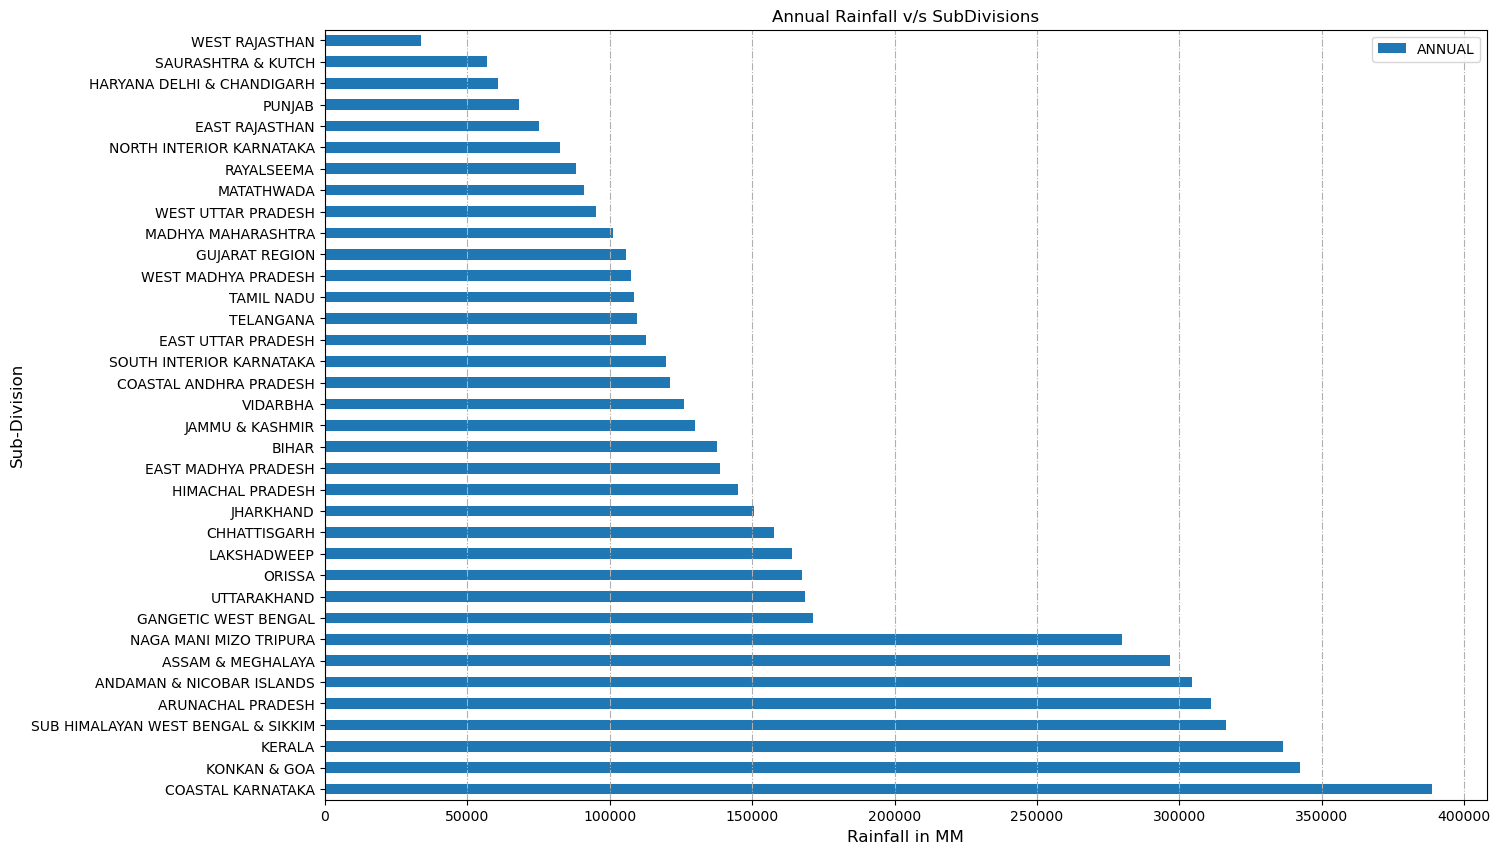

In [7]:
df[["SUBDIVISION","ANNUAL"]].groupby("SUBDIVISION").sum().sort_values(by=
'ANNUAL',ascending=False).plot(kind='barh',stacked=True,
figsize=(15,10))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.title("Annual Rainfall v/s SubDivisions")
plt.grid(axis="x",linestyle="-.")
plt.show()

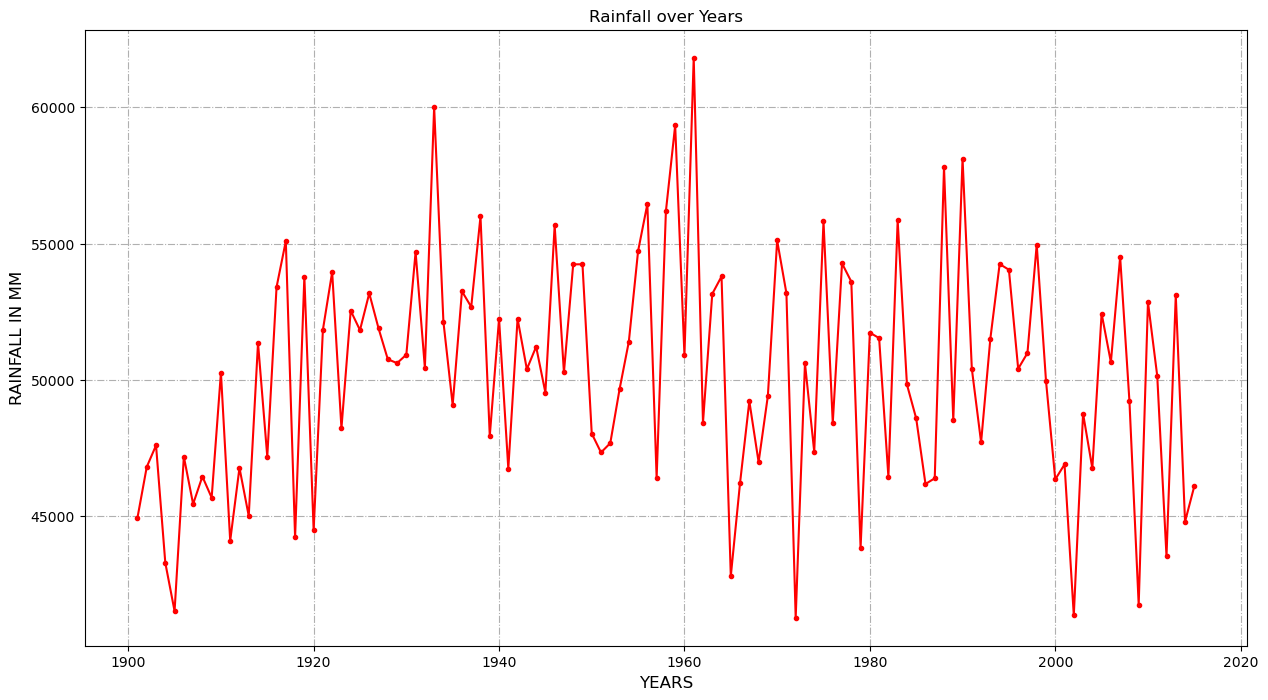

In [8]:
plt.figure(figsize=(15,8))
df.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")
plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years")
plt.show()

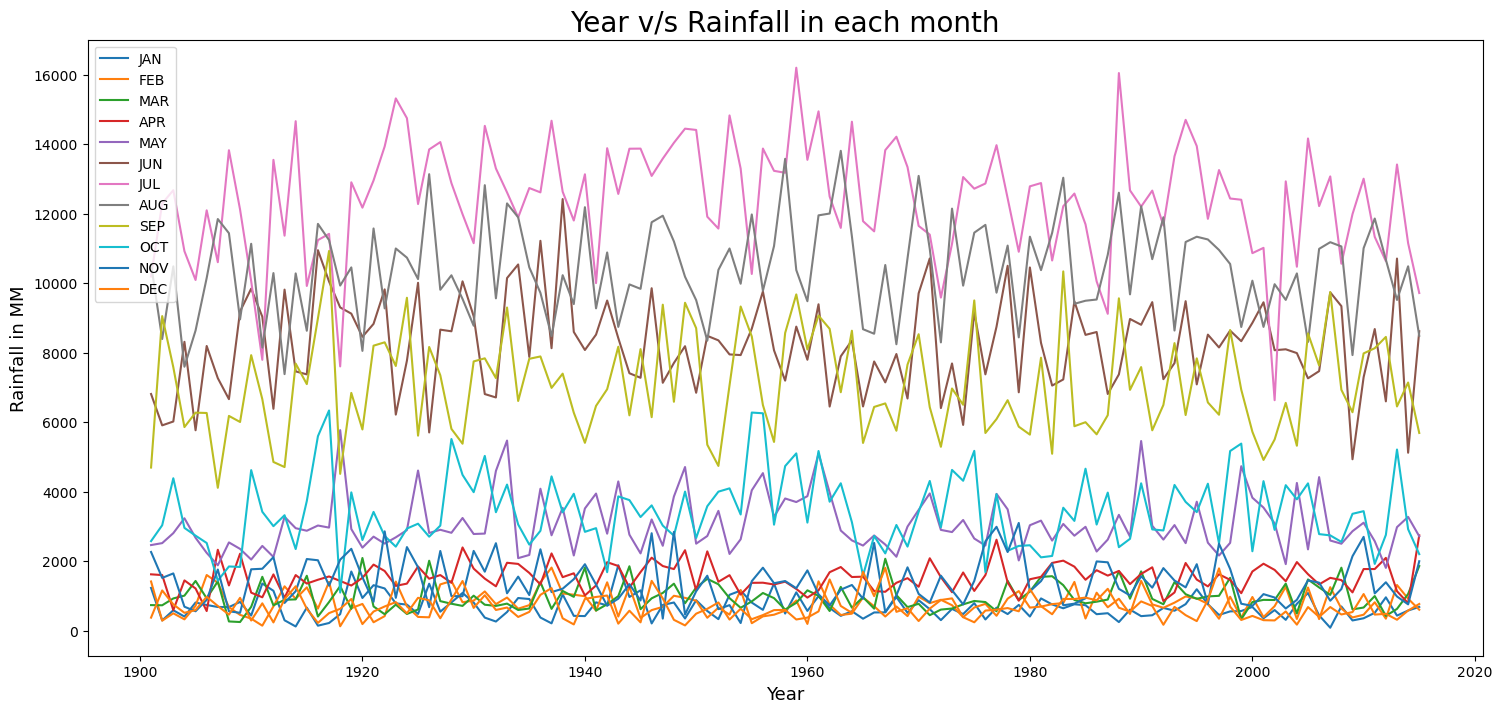

In [9]:
df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP',
 'OCT', 'NOV',
'DEC']].groupby("YEAR").sum().plot(kind="line",figsize=(18,8))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.title("Year v/s Rainfall in each month",size=20)
plt.show()

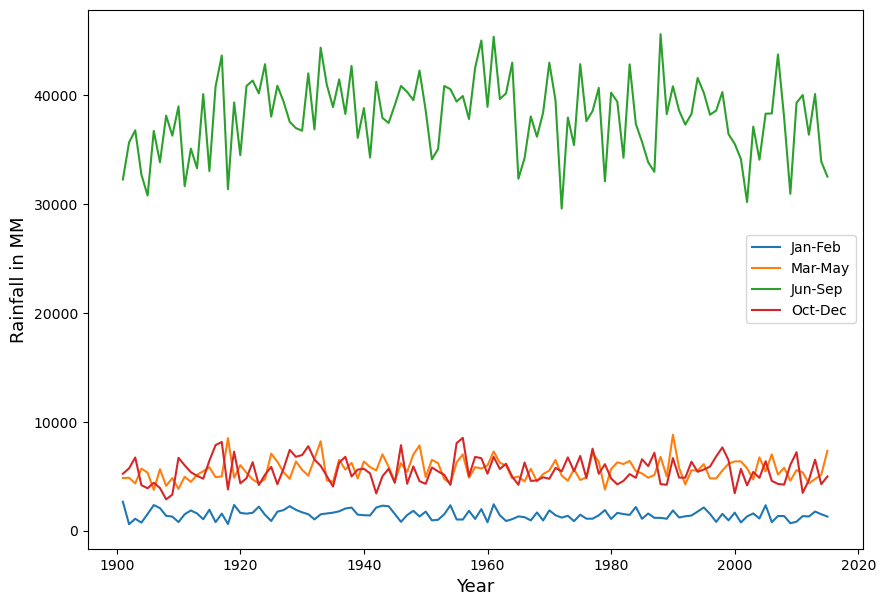

In [10]:
df[['YEAR','Jan-Feb', 'Mar-May',
 'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(10,7))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.show()

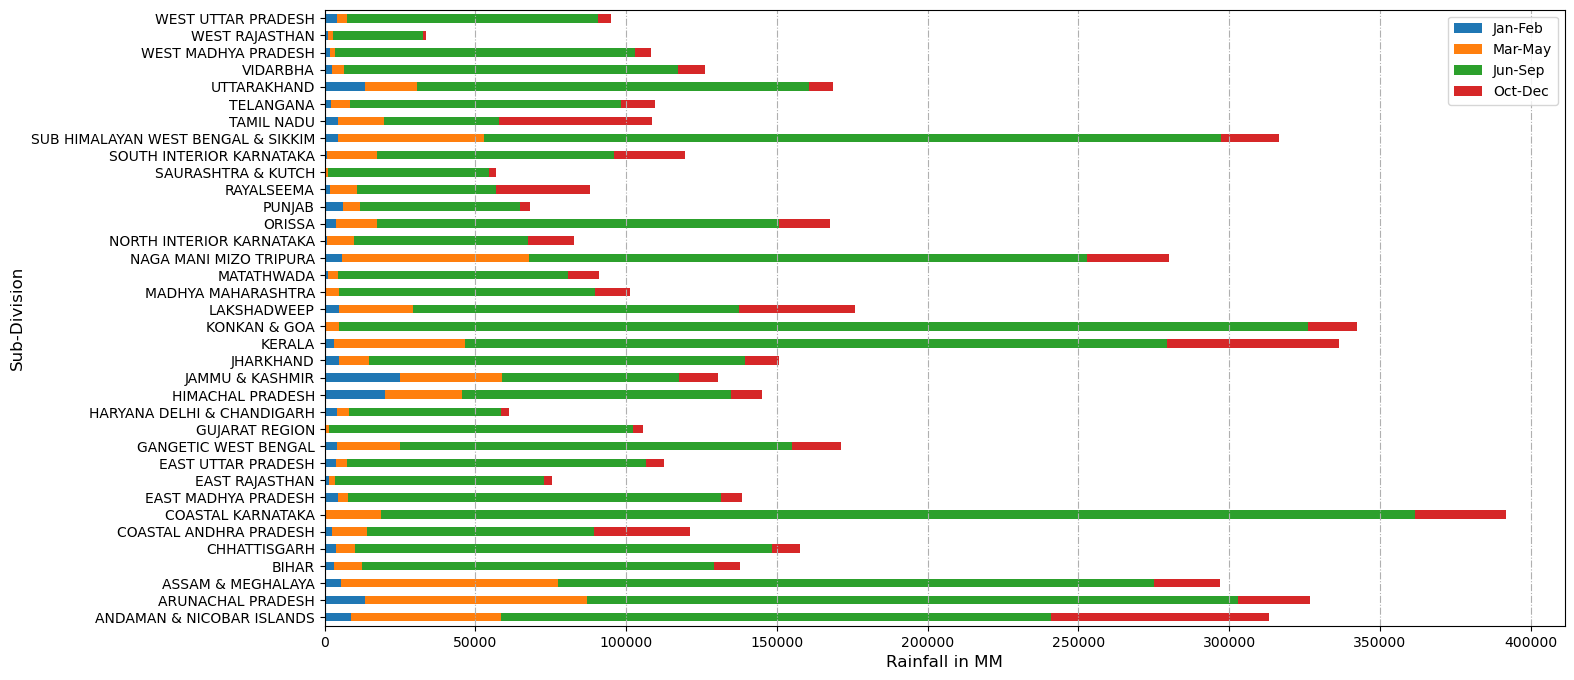

In [11]:
df[['SUBDIVISION', 'Jan-Feb', 'Mar-May','Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(16,8))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()

In [12]:
WB = df.loc[((df['SUBDIVISION'] == 'GANGETIC WEST BENGAL'))]
WB.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
552,GANGETIC WEST BENGAL,1901,37.1,58.4,3.9,64.1,121.7,198.0,280.8,275.7,313.5,51.1,83.4,0.0,1487.6,95.5,189.7,1068.0,134.4
553,GANGETIC WEST BENGAL,1902,0.0,1.2,44.2,103.8,161.6,140.9,347.8,264.8,230.5,32.5,10.4,9.9,1347.7,1.2,309.6,984.0,52.9
554,GANGETIC WEST BENGAL,1903,17.5,24.6,37.3,30.6,78.5,201.7,179.6,277.6,300.7,198.0,8.2,0.0,1354.3,42.1,146.4,959.6,206.2
555,GANGETIC WEST BENGAL,1904,0.1,23.9,35.6,17.5,160.2,286.7,435.3,241.7,142.8,35.1,4.1,0.1,1383.1,24.0,213.3,1106.4,39.3
556,GANGETIC WEST BENGAL,1905,30.9,49.6,84.7,84.9,156.8,70.9,525.5,263.6,287.6,107.3,0.0,5.2,1666.9,80.5,326.3,1147.6,112.6


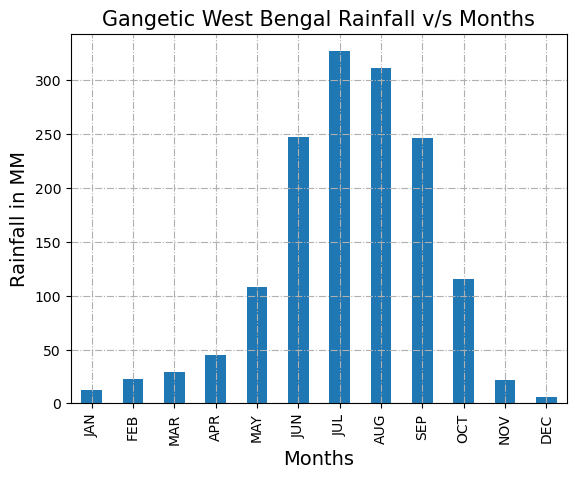

In [13]:
WB[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL','AUG', 'SEP',
'OCT','NOV','DEC']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("Gangetic West Bengal Rainfall v/s Months",size=15)
plt.xlabel("Months",size=14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-.")
plt.show()

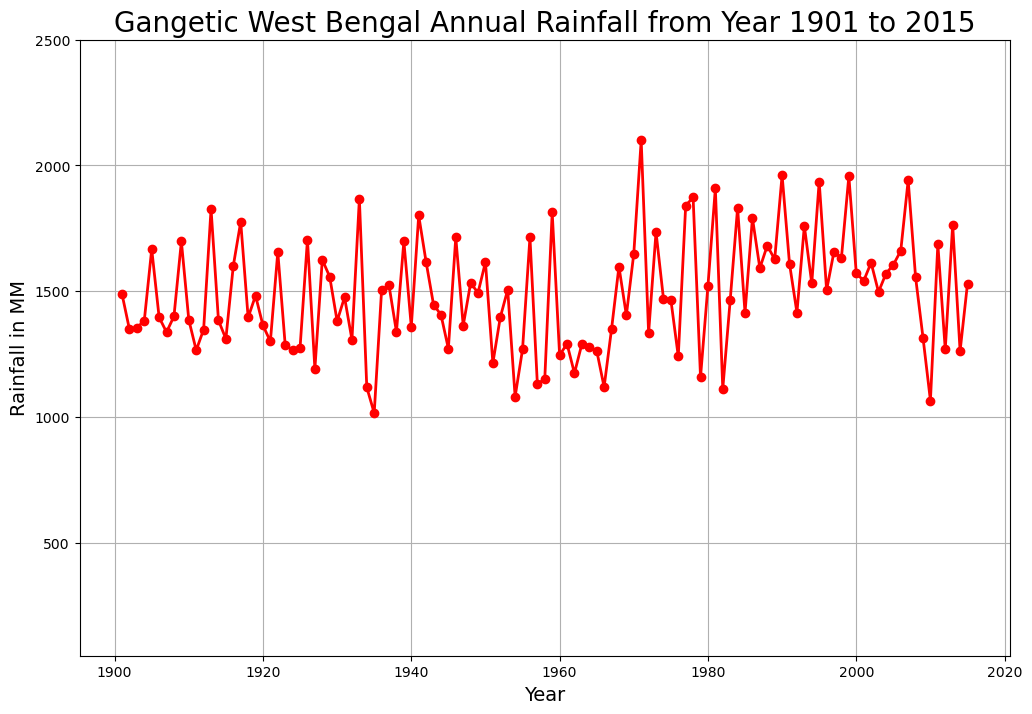

In [14]:
WB.groupby("YEAR").sum()['ANNUAL'].plot(ylim=(50,2500),color='r',marker='o',linestyle='-',linewidth=2,figsize=(12,8));
plt.xlabel('Year',size=14)
plt.ylabel('Rainfall in MM',size=14)
plt.title('Gangetic West Bengal Annual Rainfall from Year 1901 to 2015',size=20)
plt.grid()
plt.show()

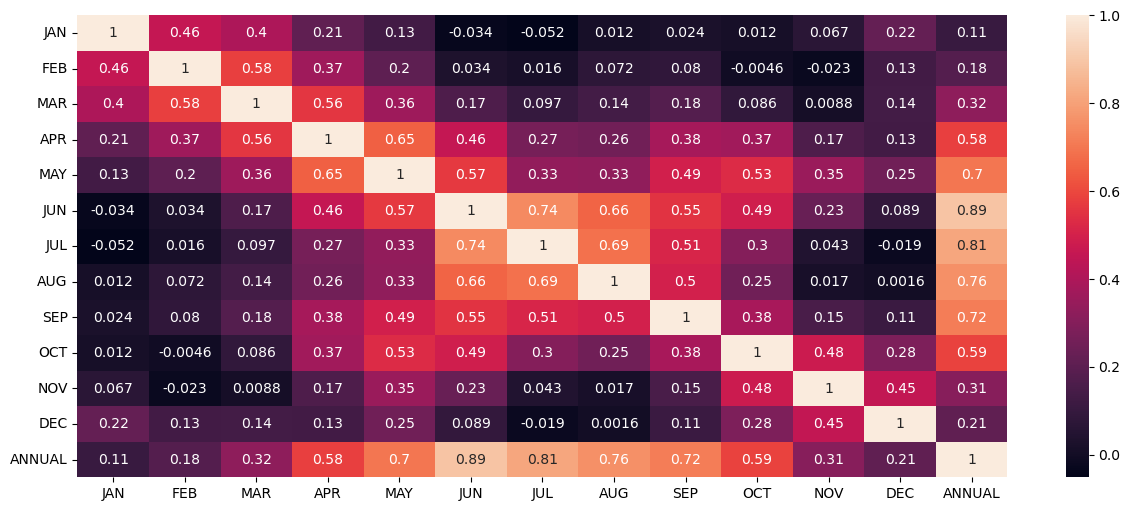

In [15]:
plt.figure(figsize=(15,6))
sns.heatmap(df[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

<Axes: >

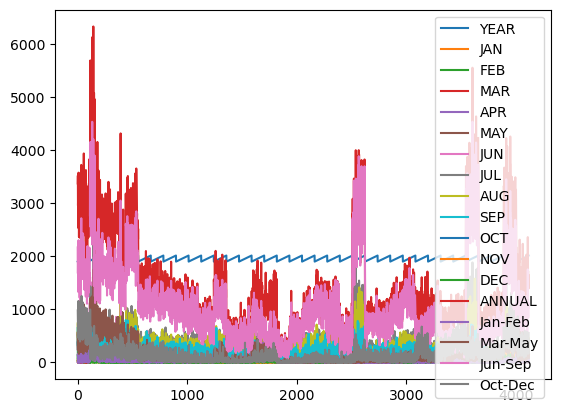

In [17]:
df.plot()

In [18]:
X=df.drop(['ANNUAL'],axis="columns")
X

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,69.3,76.7,958.5,290.5


In [19]:
X=X.drop(["SUBDIVISION"],axis="columns")
X

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,136.3,560.3,1696.3,980.3
1,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,159.8,458.3,2185.9,716.7
2,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,156.7,236.1,1874.0,690.6
3,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,24.1,506.9,1977.6,571.0
4,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,7.9,196.2,1013.0,316.6
4112,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,19.3,99.6,1119.5,167.1
4113,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,60.6,131.1,1057.0,177.6
4114,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,69.3,76.7,958.5,290.5


In [20]:
X['JAN'] = np.where(np.isnan(X['JAN']), 0, X["JAN"])
print(X["JAN"].head())

0    49.2
1     0.0
2    12.7
3     9.4
4     1.3
Name: JAN, dtype: float64


In [21]:
X['FEB'] = np.where(np.isnan(X['FEB']), 0, X["FEB"])
print(X["FEB"].head())

0     87.1
1    159.8
2    144.0
3     14.7
4      0.0
Name: FEB, dtype: float64


In [22]:
X['MAR'] = np.where(np.isnan(X['MAR']), 0, X["MAR"])
print(X["MAR"].head())

0    29.2
1    12.2
2     0.0
3     0.0
4     3.3
Name: MAR, dtype: float64


In [23]:
X['APR'] = np.where(np.isnan(X['APR']), 0.0, X["APR"])
print(X["APR"].head())

0      2.3
1      0.0
2      1.0
3    202.4
4     26.9
Name: APR, dtype: float64


In [24]:
X['MAY'] = np.where(np.isnan(X['MAY']), 0.0, X["MAY"])
print(X["MAY"].head())

0    528.8
1    446.1
2    235.1
3    304.5
4    279.5
Name: MAY, dtype: float64


In [25]:
X['JUN'] = np.where(np.isnan(X['JUN']), 0, X["JUN"])
print(X["JUN"].head())

0    517.5
1    537.1
2    479.9
3    495.1
4    628.7
Name: JUN, dtype: float64


In [26]:
X['JUL'] = np.where(np.isnan(X['JUL']), 0.0, X["JUL"])
print(X["JUL"].head())

0    365.1
1    228.9
2    728.4
3    502.0
4    368.7
Name: JUL, dtype: float64


In [27]:
X['AUG'] = np.where(np.isnan(X['AUG']), 0.0, X["AUG"])
print(X["AUG"].head())

0    481.1
1    753.7
2    326.7
3    160.1
4    330.5
Name: AUG, dtype: float64


In [28]:
X['SEP'] = np.where(np.isnan(X['SEP']), 0.0, X["SEP"])
print(X["SEP"].head())

0    332.6
1    666.2
2    339.0
3    820.4
4    297.0
Name: SEP, dtype: float64


In [29]:
X['OCT'] = np.where(np.isnan(X['OCT']), 0.0, X["OCT"])
print(X["OCT"].head())

0    388.5
1    197.2
2    181.2
3    222.2
4    260.7
Name: OCT, dtype: float64


In [30]:
X['NOV'] = np.where(np.isnan(X['NOV']), 0.0, X["NOV"])
print(X["NOV"].head())

0    558.2
1    359.0
2    284.4
3    308.7
4     25.4
Name: NOV, dtype: float64


In [31]:
X['DEC'] = np.where(np.isnan(X['DEC']), 0.0, X["DEC"])
print(X["DEC"].head())

0     33.6
1    160.5
2    225.0
3     40.1
4    344.7
Name: DEC, dtype: float64


In [33]:
Y=df['ANNUAL']
Y = np.where(np.isnan(Y), 0.0, Y)
print(Y)

[3373.2 3520.7 2957.4 ... 1426.3 1395.  1642.9]


In [35]:
X['Jan-Feb'] = np.where(np.isnan(X['Jan-Feb']), 0.0, X["Jan-Feb"])
print(X["Jan-Feb"].head())

0    136.3
1    159.8
2    156.7
3     24.1
4      1.3
Name: Jan-Feb, dtype: float64


In [36]:
X['Mar-May'] = np.where(np.isnan(X['Mar-May']), 0.0, X["Mar-May"])
print(X["Mar-May"].head())

0    560.3
1    458.3
2    236.1
3    506.9
4    309.7
Name: Mar-May, dtype: float64


In [37]:
X['Jun-Sep'] = np.where(np.isnan(X['Jun-Sep']), 0.0, X["Jun-Sep"])
print(X["Jun-Sep"].head())

0    1696.3
1    2185.9
2    1874.0
3    1977.6
4    1624.9
Name: Jun-Sep, dtype: float64


In [38]:
X['Oct-Dec'] = np.where(np.isnan(X['Oct-Dec']), 0.0, X["Oct-Dec"])
print(X["Oct-Dec"].head())

0    980.3
1    716.7
2    690.6
3    571.0
4    630.8
Name: Oct-Dec, dtype: float64


In [39]:
from sklearn.linear_model import Lasso
cross_val_score(Lasso(),X,Y)

C:\Users\Shirsadip\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.015e+07, tolerance: 1.914e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Shirsadip\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.924e+07, tolerance: 3.095e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\Shirsadip\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.905e+

array([0.94793748, 0.99945199, 0.99531077, 0.99981903, 0.98118963])

In [40]:
np.mean([0.94793748, 0.99945199, 0.99531077, 0.99981903, 0.98118963])

0.98474178

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
cross_val_score(LinearRegression(),X,Y)

array([0.86746296, 0.99943839, 0.99523788, 0.99981189, 0.97990494])

In [42]:
np.mean([0.86746296, 0.99943839, 0.99523788, 0.99981189, 0.97990494])

0.9683712119999999

In [43]:
from sklearn.naive_bayes import GaussianNB
cross_val_score(RandomForestRegressor(),X,Y)

array([0.80096777, 0.97779347, 0.90852871, 0.64655325, 0.94666659])

In [44]:
np.mean([0.80096777, 0.97779347, 0.90852871, 0.64655325, 0.94666659])

0.856101958

In [45]:
cross_val_score(KNeighborsRegressor(),X,Y)

array([0.80159758, 0.96542584, 0.94144731, 0.97960038, 0.95236146])

In [46]:
np.mean([0.80159758, 0.96542584, 0.94144731, 0.97960038, 0.95236146])

0.928086514

In [52]:
cross_val_score(DecisionTreeRegressor(),X,Y)

array([0.67749091, 0.94749952, 0.85238466, 0.08292877, 0.93534757])

In [53]:
np.mean([0.67749091, 0.94749952, 0.85238466, 0.08292877, 0.93534757])

0.6991302859999999

In [54]:
from sklearn.linear_model import Ridge
cross_val_score(Ridge(),X,Y)

array([0.86749937, 0.9994384 , 0.99523789, 0.99981189, 0.97935278])

In [55]:
np.mean([0.86749937, 0.9994384 , 0.99523789, 0.99981189, 0.97935278])

0.9682680659999999